<a href="https://colab.research.google.com/github/corinnakeum1/DS-4002/blob/main/CorinnaLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q0

What makes a model "linear"? "Linear" in what?
A model is considered "linear" if it has a linear relationship between the model coefficients and the target variable.

How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
The interpretation of coefficients for a dummy variable depends on whether the model includes an intercept. If the model includes a intercept, the coefficient for the dummy variable represents the change in the target variable when the category represented by the dummy variable is present, compared to the baseline category. Whereas if the model does not include an intercept, each dummy variable coefficient represents the absolute level of target for each respective category, since there is no baseline comparison.

Can linear regression be used for classification? Explain why, or why not.
What are signs that your linear model is over-fitting?
linear regression is not good for classification tasks because its output is a continuous variable, while classification normally requires discrete class labels. however linear regression can be used in classification in some cases by setting a threshold. If the model is overfitting, it will have high training accuracy but low test accuracy, large model complexity with too many predictors, high variance in predictions for similar observations, and residual patterns in the validation data.

Clearly explain multi-colinearity using the two-stage least squares technique.
What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable
 and your features/control/response/independent variables
?
multicollinearity occurs when two or more predicators in a model are highly correlated, making it difficult to estimate their individual effects. this leads to inflated variances for affected coefficients, which would make the model unstable and coefficients unreliable. The two stage leat squars is used for IV regression, the goal is to address issues of endogeneity. the predictors are endogenous and there is a multicollinearity between instruments and other variables, the two step least squares first regress the problematic variable on the instruments, producing fitted values.


What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
one way is polynomial terms, which allows predictor modeling curved relationships in the data. this method extends linear regression by introducing nonlinear terms that can capture more complex relationships. and Transformations like logarithmic, exponential, or square root transformations to the predictor / target variables can linearize some nonlinear relationships, allowing them to be captured by linear models.
intercept is the value of the target variable when the predictors are zero, it is a baseline level of the target when there are no effects from predictors. Slope coefficients represents the expected change in the target variable for one-unit increase in predictor, holding all other predictrs constant. coefficients for dummy variable is the expected difference in the target variable when the expected difference in the target variable when the categorical group represented by the dummy variable is present, compared to the baseline or reference group.

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Q1_clean.csv")

# Display the first few rows
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22153 entries, 0 to 22152
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 22153 non-null  int64  
 1   Review Scores Rating  22153 non-null  float64
 2   Neighbourhood         22153 non-null  object 
 3   Property Type         22153 non-null  object 
 4   Room Type             22153 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 865.5+ KB
None


In [ ]:
# Check and print column names to verify their names
print("Column names:", df.columns)

# Clean any extra whitespace in column names
df.columns = df.columns.str.strip()

# Verify column names again after cleaning
print("Cleaned column names:", df.columns)


Column names: Index(['Price', 'Review Scores Rating', 'Neighbourhood', 'Property Type',
       'Room Type'],
      dtype='object')
Cleaned column names: Index(['Price', 'Review Scores Rating', 'Neighbourhood', 'Property Type',
       'Room Type'],
      dtype='object')


Most expensive neighborhood on average:
Neighbourhood            Manhattan
Price                   183.664286
Review Scores Rating     91.801496
Name: 2, dtype: object


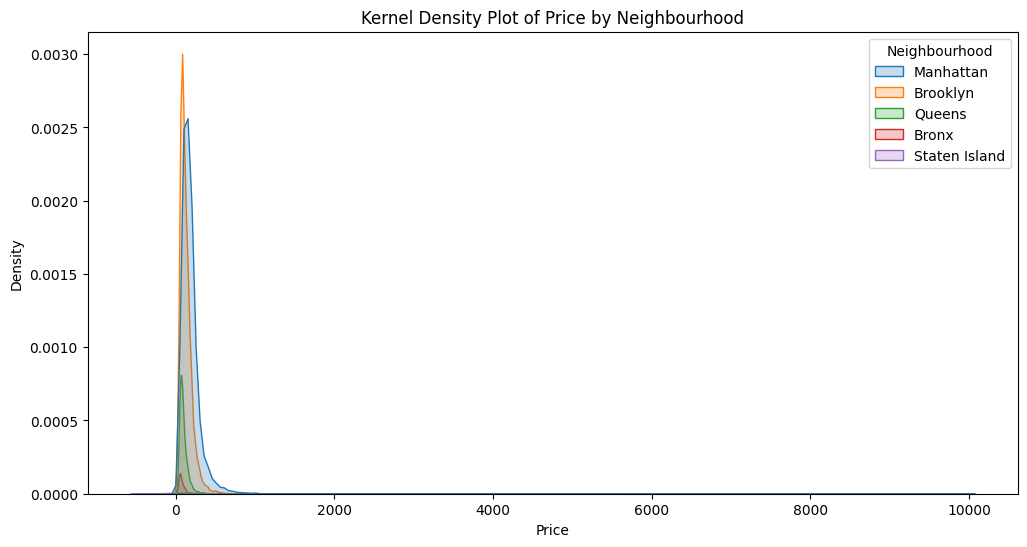

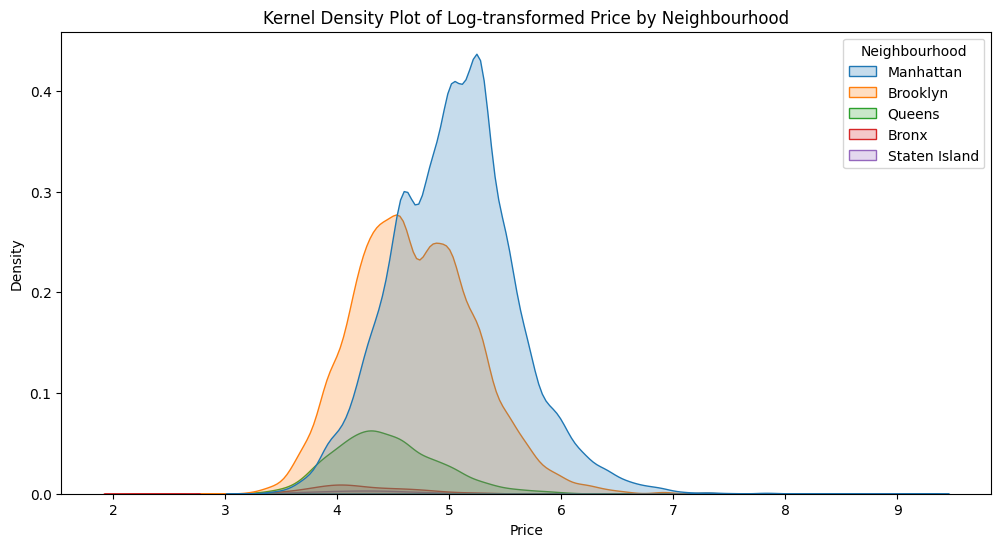

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          4.43e-226
Time:                        04:35:22   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Step 1: Clean column names (if there's an extra space in 'Neighbourhood ')
df.columns = df.columns.str.strip()

# Step 2: Compute average prices and review scores by neighborhood
avg_price_score = df.groupby('Neighbourhood').agg({
    'Price': 'mean',
    'Review Scores Rating': 'mean'
}).reset_index()

# Identify the most expensive neighborhood
most_expensive_neighbourhood = avg_price_score.loc[avg_price_score['Price'].idxmax()]
print("Most expensive neighborhood on average:")
print(most_expensive_neighbourhood)

# Step 3: Kernel Density Plot of Prices and Log Prices
# Price per night by neighborhood
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Price', hue='Neighbourhood', fill=True)
plt.title("Kernel Density Plot of Price by Neighbourhood")
plt.show()

# Log-transformed Price per night by neighborhood
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x=np.log(df['Price'] + 1), hue='Neighbourhood', fill=True)  # add 1 to avoid log(0)
plt.title("Kernel Density Plot of Log-transformed Price by Neighbourhood")
plt.show()

# Step 4: Regression of Price on Neighborhood (One-Hot Encoding without Intercept)
# Create dummy variables for 'Neighbourhood' without intercept
neighbourhood_dummies = pd.get_dummies(df['Neighbourhood'], drop_first=False)
X = neighbourhood_dummies  # Design matrix (dummy variables)
y = df['Price']  # Target variable

# Fit the linear regression model without an intercept
model = sm.OLS(y, X).fit()

# Display the regression summary
print("Regression Model Summary:")
print(model.summary())


manhattan is not only the most expensive on average but it consistently emphasizes higher prices more uniformly compared to the other boroughs. following it are brooklyn, queens, and the bronz, while staten island barely makes an impact.

In [ ]:
import pandas as pd
from sklearn import linear_model

# Assuming df is your DataFrame
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int')  # Create dummy variables for Neighbourhood

# Fit the linear regression model without an intercept
reg = linear_model.LinearRegression(fit_intercept=False).fit(X, y)

# Extract coefficients and variable names
results = pd.DataFrame({'variable': X.columns, 'coefficient': reg.coef_})
results



,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


the group means from part 1 match the coefficients obtained from the regression on the neighborhood dummies. this is because the regression ressentially calculates these group averages, given that there are no other control variables included. on the other hand, the regression coefficients for the dummy variable represent group means while accounting for all other variables included in the regression.

In [ ]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results)

print(reg.intercept_)

        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169
75.27649769585331


for this the broz was excluded, making it the reference category and its coefficient from the earlier regression serves as the intercept vale. all coefficients in this regression are now relative to the bronz: by adding the regression coefficient values to the intercept, you can obtain the coefficients from the previous regression.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame
# Prepare the feature matrix and target variable
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood']], drop_first=True)
y = df['Price']

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Get the coefficient for Review Scores Rating
coef_review_scores = model.coef_[0]  # assuming it's the first feature

# Analyze coefficients for the property types
property_types = pd.Series(model.coef_[1:])  # exclude Review Scores Rating

# Find the most expensive property type
most_expensive_property_type = property_types.idxmax()
most_expensive_coefficient = property_types.max()

# Output results
print(f"RMSE on the test set: {rmse:.2f}")
print(f"Coefficient on Review Scores Rating: {coef_review_scores:.2f}")
print(f"Most expensive property type: {most_expensive_property_type} with a coefficient of {most_expensive_coefficient:.2f}")


RMSE on the test set: 140.92
Coefficient on Review Scores Rating: 1.21
Most expensive property type: 1 with a coefficient of 107.41


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results


Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


The priciest rental property available is a top-rated 100-point location in Manhattan, costing around $192.64 per night.

In [ ]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                    pd.get_dummies(X_train['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood'], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.22035348129282306
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood  and Property Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

100-rated entire hom in manhattan would cost 170.567


What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.


In part 4, the coefficient was 1.03, while in part 5 it dropped to 0.63. When performing multiple linear regression, you can think of it as first regressing each variable of interest on all other variables, saving the residuals, and then regressing those residuals against each other. In part 4, we didnt account for room type, whereas in part 5, we included it. This shows that some variation in prices based on rating and neighborhood is linked to the types of rooms available in each area. Once we control for room type, other variables lose some predictive strength, as part of their effect is actually tied to room type. This explains why the coefficient on rating decreases.